<a href="https://colab.research.google.com/github/CrisLugg/Desafio_TelecomX/blob/main/Desafio_TelecomX.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Challenge Telecom X

## Importar Base de datos y bibliotecas

In [63]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
import seaborn as sns
import requests
import json

datos= requests.get('https://raw.githubusercontent.com/ingridcristh/challenge2-data-science-LATAM/5adf5f2f87a72bd8b2e854db16e2f2f7c499081a/TelecomX_Data.json')
resultado = json.loads(datos.text)
datos = pd.DataFrame(resultado)
datos

,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
...,...,...,...,...,...,...
7262,9987-LUTYD,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
7263,9992-RRAMN,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
7264,9992-UJOEL,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
7265,9993-LHIEB,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Two year', 'PaperlessBilling': '..."


In [64]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   customerID  7267 non-null   object
 1   Churn       7267 non-null   object
 2   customer    7267 non-null   object
 3   phone       7267 non-null   object
 4   internet    7267 non-null   object
 5   account     7267 non-null   object
dtypes: object(6)
memory usage: 340.8+ KB


## Estandarización y transformación de datos

In [65]:
customer_df = pd.json_normalize(datos['customer'])
phone_df = pd.json_normalize(datos['phone'])
internet_df = pd.json_normalize(datos['internet'])
account_df = pd.json_normalize(datos['account'])


df = pd.concat([datos[['customerID','Churn']], customer_df, phone_df, internet_df, account_df], axis=1)

df.head()

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,No,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,No,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,No,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,No,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7267 non-null   object 
 1   Churn             7267 non-null   object 
 2   gender            7267 non-null   object 
 3   SeniorCitizen     7267 non-null   int64  
 4   Partner           7267 non-null   object 
 5   Dependents        7267 non-null   object 
 6   tenure            7267 non-null   int64  
 7   PhoneService      7267 non-null   object 
 8   MultipleLines     7267 non-null   object 
 9   InternetService   7267 non-null   object 
 10  OnlineSecurity    7267 non-null   object 
 11  OnlineBackup      7267 non-null   object 
 12  DeviceProtection  7267 non-null   object 
 13  TechSupport       7267 non-null   object 
 14  StreamingTV       7267 non-null   object 
 15  StreamingMovies   7267 non-null   object 
 16  Contract          7267 non-null   object 


In [67]:
pd.set_option("display.max_columns", None)
df.head()

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,No,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,No,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,No,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,No,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


In [68]:
df['customerID'].duplicated().sum()

np.int64(0)

In [69]:
df['Charges.Total'] = pd.to_numeric(df['Charges.Total'], errors='coerce')

df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7267 non-null   object 
 1   Churn             7267 non-null   object 
 2   gender            7267 non-null   object 
 3   SeniorCitizen     7267 non-null   int64  
 4   Partner           7267 non-null   object 
 5   Dependents        7267 non-null   object 
 6   tenure            7267 non-null   int64  
 7   PhoneService      7267 non-null   object 
 8   MultipleLines     7267 non-null   object 
 9   InternetService   7267 non-null   object 
 10  OnlineSecurity    7267 non-null   object 
 11  OnlineBackup      7267 non-null   object 
 12  DeviceProtection  7267 non-null   object 
 13  TechSupport       7267 non-null   object 
 14  StreamingTV       7267 non-null   object 
 15  StreamingMovies   7267 non-null   object 
 16  Contract          7267 non-null   object 


In [70]:
df.rename(columns={'customerID': 'ID',
                   'gender': 'Gender',
                   'tenure': 'Tenure',
}, inplace=True)

In [71]:
cols = np.r_[2, 4:6, 7:16, 16:19, 1]
cat_vars = df.columns[cols].tolist()
cat_vars

['Gender',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'Churn']

In [72]:
for col in cat_vars:
    print(f"\nColumna: {col}")
    print(df[col].unique())


Columna: Gender
['Female' 'Male']

Columna: Partner
['Yes' 'No']

Columna: Dependents
['Yes' 'No']

Columna: PhoneService
['Yes' 'No']

Columna: MultipleLines
['No' 'Yes' 'No phone service']

Columna: InternetService
['DSL' 'Fiber optic' 'No']

Columna: OnlineSecurity
['No' 'Yes' 'No internet service']

Columna: OnlineBackup
['Yes' 'No' 'No internet service']

Columna: DeviceProtection
['No' 'Yes' 'No internet service']

Columna: TechSupport
['Yes' 'No' 'No internet service']

Columna: StreamingTV
['Yes' 'No' 'No internet service']

Columna: StreamingMovies
['No' 'Yes' 'No internet service']

Columna: Contract
['One year' 'Month-to-month' 'Two year']

Columna: PaperlessBilling
['Yes' 'No']

Columna: PaymentMethod
['Mailed check' 'Electronic check' 'Credit card (automatic)'
 'Bank transfer (automatic)']

Columna: Churn
['No' 'Yes' '']


In [73]:
df['Churn'].value_counts()

,count
Churn,
No,5174
Yes,1869
,224


## Tratamiento de datos nulos

In [74]:
df_remover= df.query("Churn == ''").index
df.drop(df_remover, inplace= True)
df['Churn'].value_counts()

df.fillna(0, inplace= True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                7043 non-null   object 
 1   Churn             7043 non-null   object 
 2   Gender            7043 non-null   object 
 3   SeniorCitizen     7043 non-null   int64  
 4   Partner           7043 non-null   object 
 5   Dependents        7043 non-null   object 
 6   Tenure            7043 non-null   int64  
 7   PhoneService      7043 non-null   object 
 8   MultipleLines     7043 non-null   object 
 9   InternetService   7043 non-null   object 
 10  OnlineSecurity    7043 non-null   object 
 11  OnlineBackup      7043 non-null   object 
 12  DeviceProtection  7043 non-null   object 
 13  TechSupport       7043 non-null   object 
 14  StreamingTV       7043 non-null   object 
 15  StreamingMovies   7043 non-null   object 
 16  Contract          7043 non-null   object 
 17  

## Agregar cuentas diarias

In [75]:
df['Charges.daily'] = (df['Charges.Monthly'] / 30).round(1)

df.head()

,ID,Churn,Gender,SeniorCitizen,Partner,Dependents,Tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total,Charges.daily
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,No,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.30,2.2
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,No,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.40,2.0
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,No,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85,2.5
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85,3.3
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,No,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.40,2.8


## Analisis descriptivo

In [76]:
df.describe()

,SeniorCitizen,Tenure,Charges.Monthly,Charges.Total,Charges.daily
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.734304,2.160173
std,0.368612,24.559481,30.090047,2266.794470,1.000961
min,0.000000,0.000000,18.250000,0.000000,0.600000
25%,0.000000,9.000000,35.500000,398.550000,1.200000
50%,0.000000,29.000000,70.350000,1394.550000,2.300000
75%,0.000000,55.000000,89.850000,3786.600000,3.000000
max,1.000000,72.000000,118.750000,8684.800000,4.000000


## Distribución de evasión

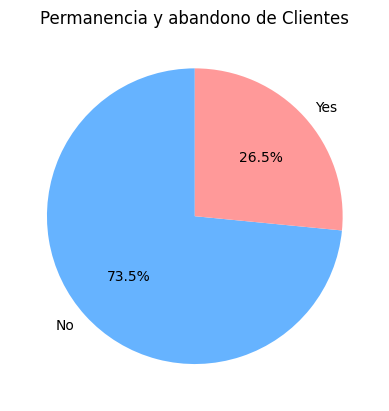

In [77]:
df['Churn'].value_counts().plot(
    kind='pie',
    autopct='%1.1f%%',
    startangle=90,
    colors=['#66b3ff','#ff9999']
)

plt.title('Permanencia y abandono de Clientes')
plt.ylabel('')
plt.show()

## Evasión por variables categórica

In [78]:
df_evasion = df[df['Churn']=='Yes']
df_evasion

,ID,Churn,Gender,SeniorCitizen,Partner,Dependents,Tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total,Charges.daily
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,No,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.90,280.85,2.5
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.00,1237.85,3.3
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,No,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.90,267.40,2.8
18,0022-TCJCI,Yes,Male,1,No,No,45,Yes,No,DSL,Yes,No,Yes,No,No,Yes,One year,No,Credit card (automatic),62.70,2791.50,2.1
19,0023-HGHWL,Yes,Male,1,No,No,1,No,No phone service,DSL,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,25.10,25.10,0.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7243,9961-JBNMK,Yes,Male,1,No,No,21,Yes,No,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),96.80,2030.30,3.2
7246,9965-YOKZB,Yes,Male,1,No,No,9,Yes,Yes,Fiber optic,No,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,83.85,790.15,2.8
7260,9985-MWVIX,Yes,Female,0,No,No,1,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,70.15,70.15,2.3
7261,9986-BONCE,Yes,Female,0,No,No,4,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Bank transfer (automatic),20.95,85.50,0.7


In [79]:
df_cat = df_evasion[cat_vars]
for col in df_cat.columns:
    print(f"--- {col} ---")
    print((df_cat[col].value_counts(normalize=True) * 100).round(2))
    print("\n")

--- Gender ---
Gender
Female    50.24
Male      49.76
Name: proportion, dtype: float64


--- Partner ---
Partner
No     64.21
Yes    35.79
Name: proportion, dtype: float64


--- Dependents ---
Dependents
No     82.56
Yes    17.44
Name: proportion, dtype: float64


--- PhoneService ---
PhoneService
Yes    90.9
No      9.1
Name: proportion, dtype: float64


--- MultipleLines ---
MultipleLines
Yes                 45.48
No                  45.43
No phone service     9.10
Name: proportion, dtype: float64


--- InternetService ---
InternetService
Fiber optic    69.40
DSL            24.56
No              6.05
Name: proportion, dtype: float64


--- OnlineSecurity ---
OnlineSecurity
No                     78.17
Yes                    15.78
No internet service     6.05
Name: proportion, dtype: float64


--- OnlineBackup ---
OnlineBackup
No                     65.97
Yes                    27.98
No internet service     6.05
Name: proportion, dtype: float64


--- DeviceProtection ---
DeviceProtecti

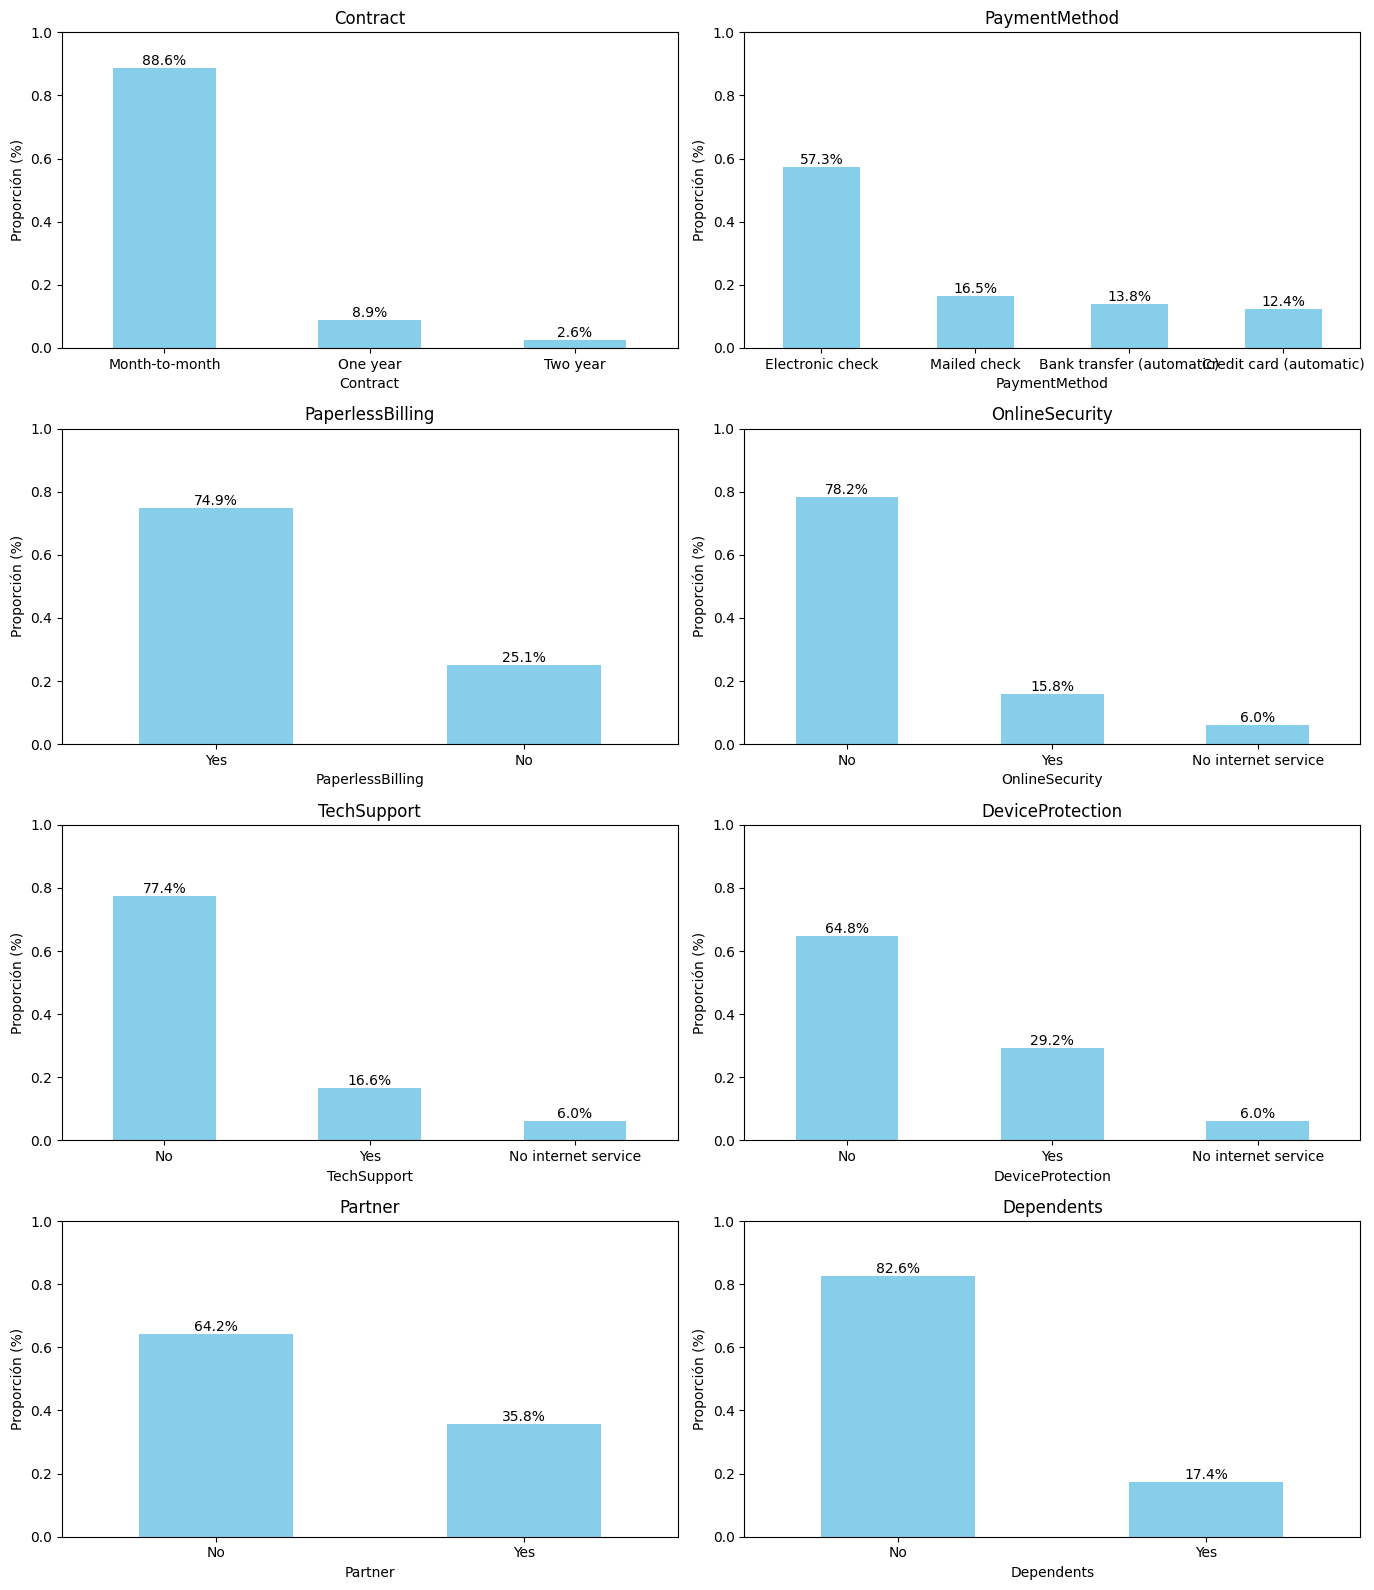

In [80]:
categoricas_clave = [
    'Contract', 'PaymentMethod', 'PaperlessBilling',
    'OnlineSecurity', 'TechSupport', 'DeviceProtection',
    'Partner', 'Dependents'
]


fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(14,16))
axes = axes.flatten()

for i, col in enumerate(categoricas_clave):
    df_evasion[col].value_counts(normalize=True).sort_values(ascending=False).plot(
        kind='bar', ax=axes[i], color='skyblue'
    )
    axes[i].set_title(col)
    axes[i].set_ylabel('Proporción (%)')
    axes[i].set_ylim(0,1)
    axes[i].tick_params(axis='x', rotation=0)
    for p in axes[i].patches:
        axes[i].annotate(f"{p.get_height()*100:.1f}%", (p.get_x()+p.get_width()/2, p.get_height()),
                         ha='center', va='bottom')

plt.tight_layout()
plt.show()

In [81]:
df_evasion = df_evasion.copy()

df_evasion['Gender_Contract'] = df_evasion['Gender'] + " | " + df_evasion['Contract']

heatmap_data = df_evasion.groupby(['Gender_Contract', 'InternetService']).size().unstack()

colors = LinearSegmentedColormap.from_list("colors", ["blanchedalmond", "darkred"])

plt.figure(figsize=(8, 8))

sns.heatmap(heatmap_data, annot=True, fmt='d', cmap=colors, linewidths=0.5, linecolor='gray')

plt.title('Evasión por variables categórica')
plt.xlabel('Internet Service')
plt.ylabel('Gender + Contract')
plt.tight_layout()


## Evasión por variables numéricas

In [82]:
Variables_numericas = [ 'Churn', 'Charges.Monthly', 'Tenure']

df_num = df[Variables_numericas].sort_values('Churn').set_index('Churn')
df_num

,Charges.Monthly,Tenure
Churn,,
No,65.60,9
No,20.50,35
No,74.30,57
No,111.35,59
No,64.70,72
...,...,...
Yes,81.70,1
Yes,19.85,3
Yes,106.95,53


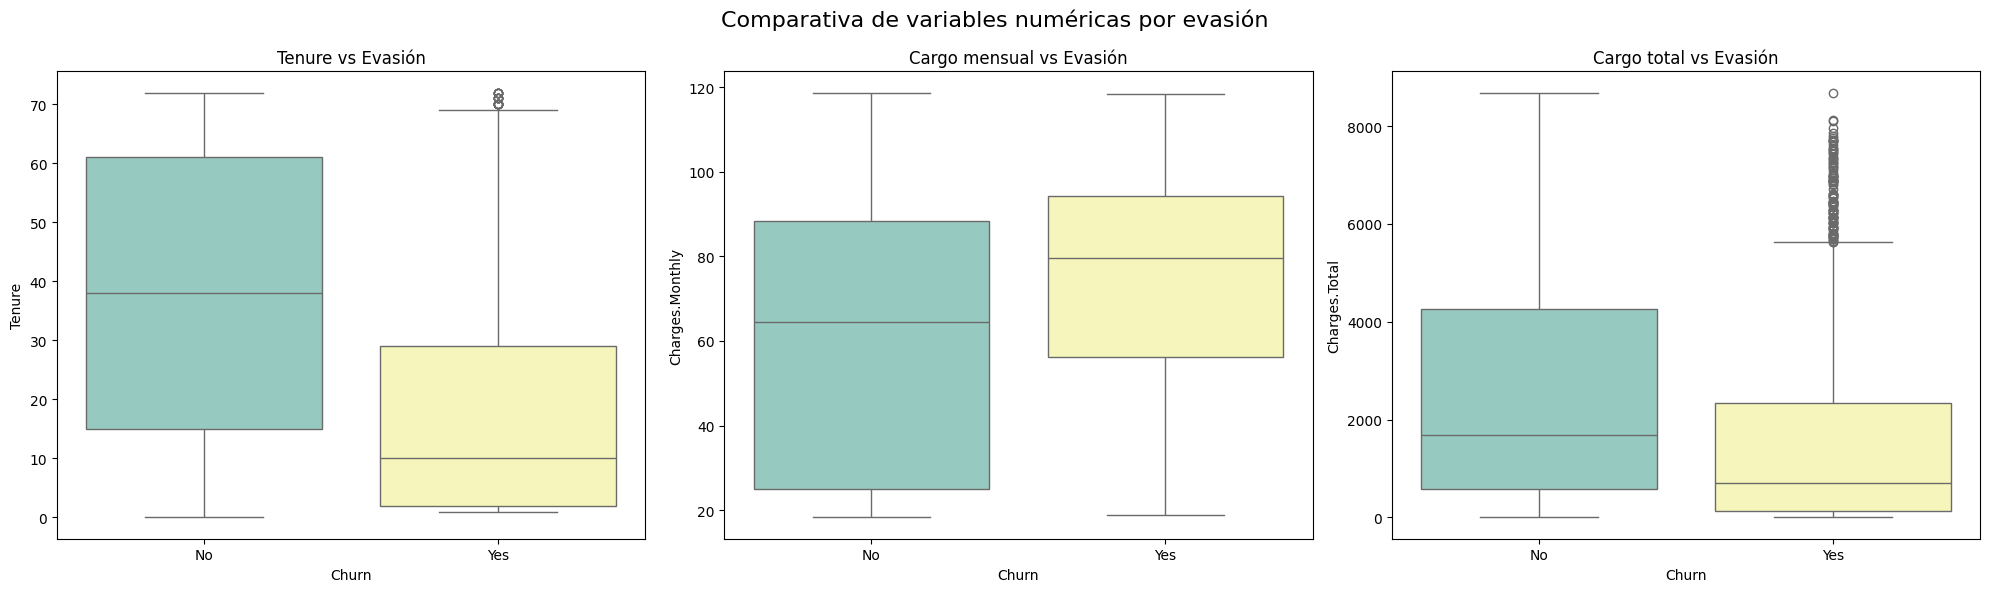

In [85]:
df_churn = df[df['Churn'].isin(['Yes', 'No'])]

fig, axes = plt.subplots(1, 3, figsize=(20, 6))

sns.boxplot(ax=axes[0], data=df_churn, x='Churn', y='Tenure', hue='Churn', palette='Set3', legend=False)
axes[0].set_title('Tenure vs Evasión')

sns.boxplot(ax=axes[1], data=df_churn, x='Churn', y='Charges.Monthly', hue='Churn', palette='Set3', legend=False)
axes[1].set_title('Cargo mensual vs Evasión')

sns.boxplot(ax=axes[2], data=df_churn, x='Churn', y='Charges.Total', hue='Churn', palette='Set3', legend=False)
axes[2].set_title('Cargo total vs Evasión')

plt.suptitle('Comparativa de variables numéricas por evasión', fontsize=16)
plt.tight_layout()
plt.show()

# Informe

# Informe Final - Análisis de Evasión de Clientes (Churn) en Telecom X

## 1. Introducción

Este estudio se centra en analizar la evasión de clientes (churn) dentro de la plataforma de servicios de Telecom X. La pérdida de usuarios es un desafío crítico, pues afecta directamente los ingresos y la estabilidad del negocio. El propósito de este análisis es identificar patrones y factores asociados a la decisión de cancelar una suscripción, generando con ello estrategias que mejoren la retención y fidelización de clientes.

---

## 2. Preparación y Tratamiento de Datos

El primer paso fue la importación de un archivo JSON, cargado como DataFrame con pandas. La estructura original contenía información anidada sobre datos personales, servicios contratados y detalles de facturación.

Las tareas de limpieza y normalización incluyeron:

- **Estandarización de columnas:** se homogenizaron los nombres de las variables y se desanidaron los diccionarios de servicios (cliente, teléfono, internet y cuenta) en columnas individuales.
- **Valores faltantes:** se verificó la ausencia de datos críticos.
- **Conversión de tipos:** campos como `Charges.Monthly` y `Charges.Total` se convirtieron a numérico.
- **Unificación de la variable Churn:** todos los clientes activos quedaron identificados como “No” y los cancelados como “Yes”, asegurando consistencia para el análisis.

---

## 3. Análisis Exploratorio

El análisis exploratorio (EDA) permitió observar cómo se comporta la evasión en función de distintas características.

- **Proporción general de bajas:**  
  Un gráfico de barras evidenció que, aunque la mayoría de los clientes se mantuvo, la tasa de cancelación no es menor y requiere atención.

  ![Distribución de Churn](https://github.com/CrisLugg/Desafio_TelecomX/raw/main/img/churn_distribution.png)

- **Variables categóricas:**  
  Factores como género, conexión, tipo de contrato y método de pago fueron contrastados con la tasa de evasión. Los resultados muestran diferencias notables entre categorías.

  ![Churn por categóricas](https://github.com/CrisLugg/Desafio_TelecomX/raw/main/img/churn_cat.png)  
  ![Churn por genero, conexión y tipo de contrato](https://github.com/CrisLugg/Desafio_TelecomX/raw/main/img/churn_categoricas.png)

- **Variables numéricas:**  
  Al analizar `tenure`, `Charges.Monthly` y `Charges.Total` mediante boxplots, se observó que clientes con menor antigüedad y mayores gastos mensuales tienden a cancelar con más frecuencia.

  ![Distribución de cargos mensuales](https://github.com/CrisLugg/Desafio_TelecomX/raw/main/img/churn_numericas.png) 

- **Servicios adicionales y perfil familiar:**  
  La ausencia de servicios como soporte técnico, protección y backup, así como no tener pareja o dependientes, se asocian a mayor churn.

  ![Churn por dependientes](img/churn_cat.png)

---

## 4. Conclusiones e Insights

De los resultados obtenidos se desprenden los siguientes puntos clave:

- **Magnitud de la evasión:**  
  Un número considerable de clientes canceló, lo que confirma la necesidad de acciones preventivas.

- **Tenure:**  
  Los usuarios con menor tiempo en la plataforma son más propensos a la baja.

- **Charges.Monthly y Charges.Total:**  
  Un gasto mensual elevado incrementa la probabilidad de cancelación.

- **Contrato y método de pago:**  
  Ambos influyen en la permanencia, destacando los contratos mes a mes y el método “Electronic check” como los más vulnerables al churn.

- **Distribución desigual:**  
  Algunos segmentos de clientes, como quienes carecen de servicios adicionales o no tienen dependientes, son más proclives al abandono.

---

## 5. Recomendaciones

A partir de los insights, se sugieren las siguientes medidas:

1. **Incentivar contratos largos:**  
   Ofrecer beneficios o descuentos para que quienes optan por contratos cortos migren a planes de mayor duración.

2. **Aumentar el valor percibido:**  
   Reforzar la propuesta de los servicios premium, en especial para quienes enfrentan cargos mensuales elevados.

3. **Campañas focalizadas:**  
   Dirigir promociones específicas a usuarios con bajo tenure para motivar la renovación.

4. **Promover métodos de pago automáticos:**  
   Reducir la dependencia del “Electronic check” mediante incentivos para el uso de otros métodos.

5. **Segmentación inteligente:**  
   Usar datos de comportamiento y perfil para personalizar ofertas, reduciendo así el riesgo de cancelación.

---
